# Import Libraries

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
path = 'gdrive/My Drive/Colab Notebooks/'
os.chdir(path)

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image
%matplotlib inline

# Declare Directory


In [ ]:
NOTEBOOK_DIRECTORY = os.getcwd()
DATA_DIR = os.path.join(os.getcwd(), "data", "data")

In [ ]:
DATA_DIR
# NOTEBOOK_DIRECTORY

'/content/gdrive/My Drive/Colab Notebooks/data/data'

## Import Image as PIL Object

In [ ]:
from matplotlib import image

def pil_object(DATA_DIR):
  pil_obj_list = []
  genre_list = []
  for genre in os.listdir(DATA_DIR):
    for file in os.listdir(os.path.join(DATA_DIR,genre)):
      pil_obj = Image.open(os.path.join(DATA_DIR,genre,file))
      pil_obj = pil_obj.resize(size=(28,28))
      pil_obj_list.append(np.asarray(pil_obj))
      genre_list.append(genre)
  return pil_obj_list, genre_list
     
pil_obj_list, genre_list = pil_object(DATA_DIR)


In [ ]:
pil_obj_list[0].shape

(28, 28, 4)

In [ ]:
Image.fromarray(pil_obj_list[0])

## Neural Network

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [ ]:
x = np.array(pil_obj_list)
x = x/255.0

genre_dict = {'Alternative':1, 'Blues':2, 'Country':3, 'Folk':4, 'Jazz':5, 'Metal':6, 'Pop':7, 'Rap':8, 'Rock':9, 'Soul':10}
y = []
for genre in genre_list:
  y.append(genre_dict[genre])
y = np.array(y)
y = keras.utils.to_categorical(y)
y.shape
# x.shape


(995, 11)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=[28,28,4]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(11,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 64)                200768    
_________________________________________________________________
dense_56 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_57 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_58 (Dense)             (None, 11)                363       
Total params: 204,267
Trainable params: 204,267
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.000001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
history = model.fit(x, y, batch_size=10, epochs=200, validation_split=0.15)

Epoch 1/200
85/85 [==============================] - 0s 4ms/step - loss: 2.5100 - accuracy: 0.1172 - val_loss: 2.5867 - val_accuracy: 0.0000e+00
Epoch 2/200
85/85 [==============================] - 0s 3ms/step - loss: 2.4745 - accuracy: 0.1172 - val_loss: 2.5596 - val_accuracy: 0.0000e+00
Epoch 3/200
85/85 [==============================] - 0s 3ms/step - loss: 2.4530 - accuracy: 0.1172 - val_loss: 2.5415 - val_accuracy: 0.0000e+00
Epoch 4/200
85/85 [==============================] - 0s 3ms/step - loss: 2.4403 - accuracy: 0.1172 - val_loss: 2.5291 - val_accuracy: 0.0000e+00
Epoch 5/200
85/85 [==============================] - 0s 3ms/step - loss: 2.4312 - accuracy: 0.1172 - val_loss: 2.5163 - val_accuracy: 0.0000e+00
Epoch 6/200
85/85 [==============================] - 0s 3ms/step - loss: 2.4246 - accuracy: 0.1172 - val_loss: 2.5081 - val_accuracy: 0.0000e+00
Epoch 7/200
85/85 [==============================] - 0s 3ms/step - loss: 2.4198 - accuracy: 0.1172 - val_loss: 2.4984 - val_accura

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

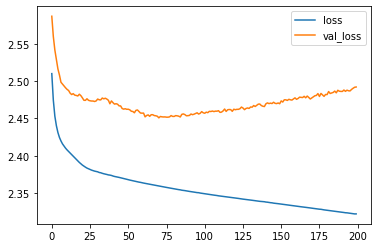

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df[['loss','val_loss']].plot()